# Exam for Machine Learning Python Lab
## 03/02/2022
## Napolitano Daniele 
---
### 1. Load the data file and explore the data, showing size, data descriptions, data distributions with boxplot, and correlation between columns

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import silhouette_score, silhouette_samples
from mpl_toolkits import mplot3d
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

random_state = 42

In [4]:
#load data
df=pd.read_csv('ml_python_labexam_2023_02_03.csv')
print("shape: ", df.shape)
df.head()

shape:  (1000, 11)


,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,y
0,-0.016771,-0.026036,-0.001474,0.104545,0.352163,0.023372,0.003706,0.004963,-0.007113,0.022166,3.288439
1,-0.011618,0.025699,-0.026818,0.053014,0.613195,-0.012447,0.029382,-0.006348,-0.036920,-0.016464,-2.333510
2,0.027478,0.009282,-0.020700,0.630085,0.612415,-0.004157,0.008240,0.019062,0.010821,-0.012983,2.259783
3,-0.003170,-0.001697,-0.028924,0.389900,0.000182,0.027526,0.012792,-0.021192,-0.011102,0.015352,2.939127
4,-0.039508,-0.009104,0.021215,0.951426,0.778600,0.018246,-0.000294,-0.012900,0.004178,0.014846,1.623948


In [5]:
#data description
df.describe()

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,y
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.000127,0.000297,-0.000421,3.378287e-01,2.521912e-01,0.000364,-0.000191,0.000553,0.000130,0.000524,0.437747
std,0.023475,0.018878,0.019124,2.952473e-01,2.877240e-01,0.017402,0.019349,0.017783,0.018999,0.025391,2.407762
min,-0.074550,-0.055749,-0.063489,9.531015e-07,6.913766e-10,-0.054694,-0.058531,-0.054578,-0.062925,-0.073059,-6.609545
25%,-0.015763,-0.012357,-0.013722,6.778294e-02,1.552023e-02,-0.011251,-0.013393,-0.011797,-0.012001,-0.018202,-1.200759
50%,0.000446,0.000269,-0.000891,2.638645e-01,1.218160e-01,0.000675,-0.000333,0.000422,-0.000858,-0.000219,0.336424
75%,0.015529,0.013924,0.012571,5.712697e-01,4.295876e-01,0.012217,0.012797,0.012697,0.012722,0.018642,2.175038
max,0.079599,0.073114,0.052593,9.996939e-01,9.988956e-01,0.053673,0.051803,0.049480,0.061867,0.081461,7.915506


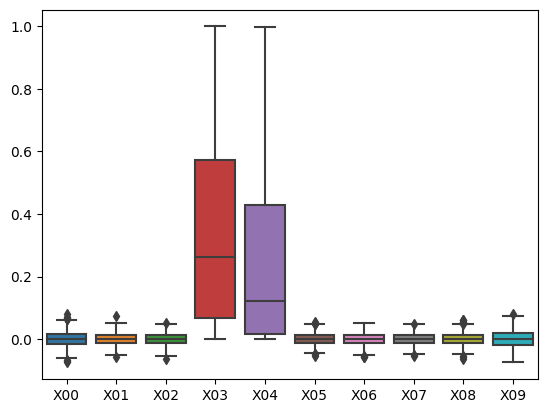

In [10]:
#boxplot of all features except the target "y"
sns.boxplot(data=df.drop('y', axis=1))
plt.show()

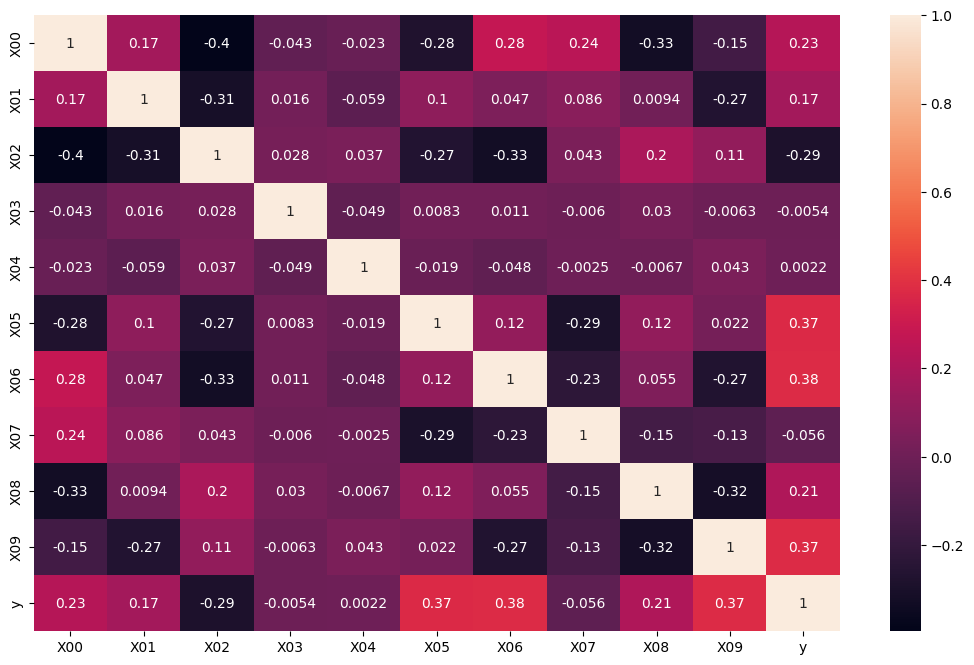

In [18]:
#show correlations between features
plt.figure(figsize=(13,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

---
### 2. Comment the exploration of step 1 pointing out if there are predicting columns having the absolute value of correlation with the target less than 0.15

There are 10 predicting features and one label (y).<br>
columns X03 and X04 have a very different range of value compared to all other features.

Now, let's check if there are predicting columns having the absolute value of correlation with the target less than 0.15.


In [21]:
abs_corr_target=df.corr()['y'].abs().sort_values(ascending=False)
#show the values with the absolute correlation less than 0.15, as a dataframe
abs_corr_target[abs_corr_target<0.15].to_frame()


,y
X07,0.056175
X03,0.005415
X04,0.002213


As it was already visible in the correlation heatmap matrix above, the features X03, X04 and X07 have very low correlation with the target.

---
### 3. train test a multivariate linear regressor and show the Root Mean Squared Error

In [22]:
#make a multivariate linear regressor
from sklearn.linear_model import LinearRegression
#evaluate with root mean squared error
from sklearn.metrics import mean_squared_error

#split data into train and test
X_train, X_test, y_train, y_test = train_test_split(df.drop('y', axis=1), df['y'], test_size=0.2, random_state=random_state)

#train the model
model = LinearRegression()
model.fit(X_train, y_train)

#predict on test data
y_pred = model.predict(X_test)

#evaluate the model
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))


RMSE:  0.8550066730486877


---
### 4. train test a multivariate linear regressor on the reduced dataset obtained dropping the columns loosely correlated with the target, and show the Root Mean Squared Error

In [23]:
#drop the features with the absolute correlation less than 0.15
df_reduced=df.drop(abs_corr_target[abs_corr_target<0.15].index, axis=1)

train again as before, this time with the reduced dataframe, and compare the RMSE score.

In [24]:
#split data into train and test
X_train, X_test, y_train, y_test = train_test_split(df_reduced.drop('y', axis=1), df_reduced['y'], test_size=0.2, random_state=random_state)

#train the model
model = LinearRegression()
model.fit(X_train, y_train)

#predict on test data
y_pred = model.predict(X_test)

#evaluate the model
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))


RMSE:  0.9624394299596232


The RMSE of the reduced dataset is slightly higher than before (+0.10), meaning it has a slightly worse performance, but the model is simplified by removing 3 features.

---
### 5. train and test on the reduced dataset a decision tree regressor, and show the Root Mean Squared Error

In [50]:
# 5. train and test on the reduced dataset a decision tree regressor, and show the Root Mean Squared Error
from sklearn.tree import DecisionTreeRegressor

#split data into train and test
X_train, X_test, y_train, y_test = train_test_split(df_reduced.drop('y', axis=1), df_reduced['y'], test_size=0.2, random_state=random_state)

#train the model
model = DecisionTreeRegressor(random_state=random_state)
model.fit(X_train, y_train)

#predict on test data
y_pred = model.predict(X_test)

#evaluate the model
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE:  1.893770036036949


In this case, the RMS is much higher than the linear regressor, of both normal and reduced dataset (almost +1.0)

---
### 6. optimise the depth of the decision tree regressor of step 5 searching for the minimum Root Mean Squared Error with cross-validation, and show the best RMSE

In [86]:
#don't show warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import make_scorer

X_train, X_test, y_train, y_test = train_test_split(df_reduced.drop('y', axis=1), df_reduced['y'], test_size=0.2, random_state=random_state)

#define the rmse scoring function, to be used in grid search
def rmse(y_pred, y_true):
    return (mean_squared_error(y_true, y_pred))
rmse_scorer = make_scorer(rmse, greater_is_better=False)
#search for the best depth
params={'max_depth': np.arange(1,30)}
model = DecisionTreeRegressor(random_state=random_state)
grid = GridSearchCV(model, params, cv=5, scoring=rmse_scorer, return_train_score=False)
grid.fit(X_train, y_train)

#show the best depth
print("best depth: ", grid.best_params_['max_depth'])
#show the best score
print("best score: ", -grid.best_score_)



best depth:  5
best score:  4.246756997824543


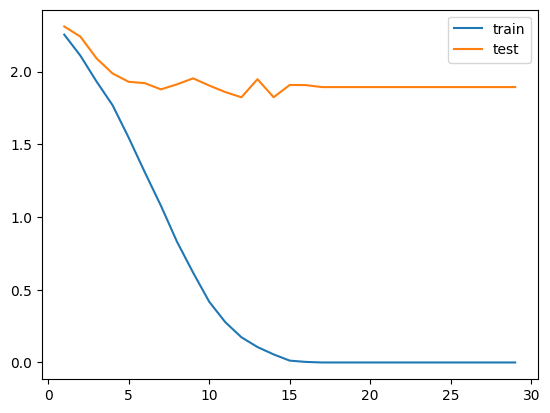

lowest test score:  1.8236509222826147
corresponding depth:  12


In [87]:
from sklearn.model_selection import cross_val_score

scores_train=[]
scores_test=[]
for i in range(1,30):
    #train the model
    model = DecisionTreeRegressor(max_depth=i, random_state=random_state)
    model.fit(X_train, y_train)

    #predict on test data
    y_pred = model.predict(X_test)

    #evaluate the model
    scores_test.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    scores_train.append(np.sqrt(mean_squared_error(y_train, model.predict(X_train))))

#plot scores
plt.plot(range(1,30), scores_train, label='train')
plt.plot(range(1,30), scores_test, label='test')
plt.legend()
plt.show()

#print lowest test score
print("lowest test score: ", min(scores_test))
#print the corresponding depth
print("corresponding depth: ", np.argmin(scores_test)+1)